In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def value_iteration(p_h, theta=1e-9):
    V = np.zeros(101)
    V[100] = 1.0
    policy = np.zeros(101, dtype=int)
    iterations = 0

    while True:
        delta = 0
        V_old = V.copy()

        for s in range(1, 100):
            action_values = []
            for a in range(1, min(s, 100-s) + 1):
                win_value = 1 if (s + a) == 100 else V_old[s+a]
                lose_value = V_old[s-a]
                action_value = p_h * win_value + (1 - p_h) * lose_value
                action_values.append(action_value)
            best_value = max(action_values) if action_values else 0
            delta = max(delta, abs(best_value - V[s]))
            V[s] = best_value
        iterations += 1
        if delta < theta:
            break

    for s in range(1, 100):
        actions = range(1, min(s, 100-s) + 1)
        action_values = []
        for a in actions:
            win_value = 1 if (s + a) == 100 else V[s+a]
            lose_value = V[s-a]
            action_value = p_h * win_value + (1 - p_h) * lose_value
            action_values.append(action_value)
        if action_values:
            best_action = list(actions)[np.argmax(action_values)]
            policy[s] = best_action
    return V, policy, iterations

if __name__ == "__main__":
    p_h = 0.4
    V, policy, iters = value_iteration(p_h)
    print("Converged in iterations:", iters)
    print("Value function:", V)
    print("Optimal policy:", policy)

Converged in iterations: 31
Value function: [0.         0.00206562 0.00516406 0.00922547 0.01291015 0.0173854
 0.02306368 0.02781411 0.03227539 0.03768507 0.0434635  0.05035447
 0.05765919 0.06523937 0.06953528 0.07443124 0.08068847 0.08661104
 0.09421268 0.10314362 0.10865874 0.11596663 0.12588617 0.13357998
 0.14414799 0.16       0.16309844 0.16774609 0.17383821 0.17936523
 0.1860781  0.19459552 0.20172117 0.20841308 0.21652761 0.22519525
 0.2355317  0.24648879 0.25785906 0.26430292 0.27164686 0.2810327
 0.28991657 0.30131902 0.31471544 0.32298812 0.33394994 0.34882926
 0.36036996 0.37622198 0.4        0.40309844 0.40774609 0.41383821
 0.41936523 0.4260781  0.43459552 0.44172117 0.44841308 0.45652761
 0.46519525 0.4755317  0.48648879 0.49785906 0.50430292 0.51164686
 0.5210327  0.52991657 0.54131902 0.55471544 0.56298812 0.57394994
 0.58882926 0.60036996 0.61622198 0.64       0.64464766 0.65161914
 0.66075731 0.66904785 0.67911715 0.69189327 0.70258175 0.71261962
 0.72479141 0.737792

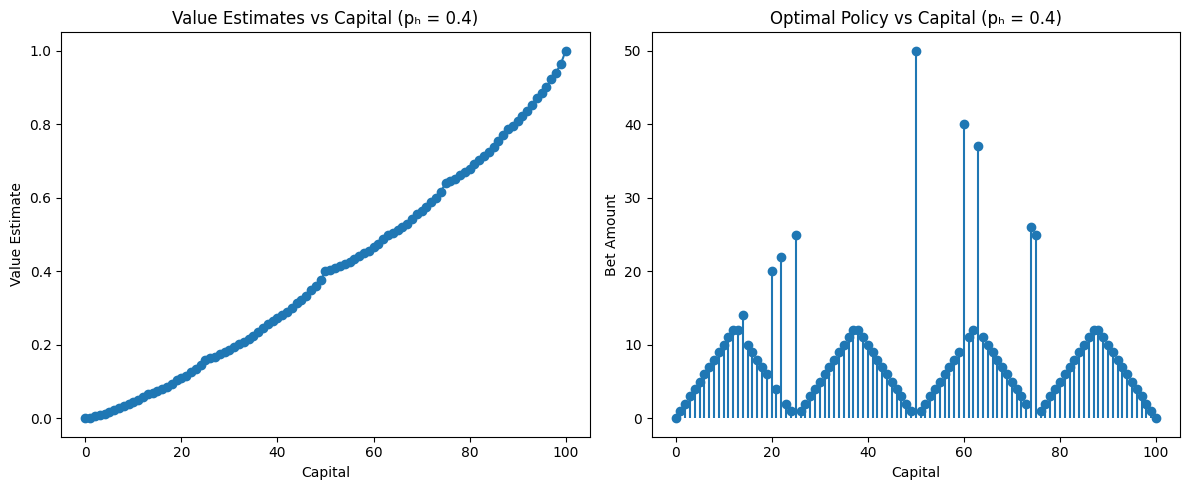

In [6]:
p_h = 0.4
V, policy, iters = value_iteration(p_h)
capitals = np.arange(101)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(capitals, V, marker='o')
plt.title("Value Estimates vs Capital (pₕ = 0.4)")
plt.xlabel("Capital")
plt.ylabel("Value Estimate")

plt.subplot(1, 2, 2)
plt.stem(capitals, policy, basefmt=" ")
plt.title("Optimal Policy vs Capital (pₕ = 0.4)")
plt.xlabel("Capital")
plt.ylabel("Bet Amount")

plt.tight_layout()
plt.show()


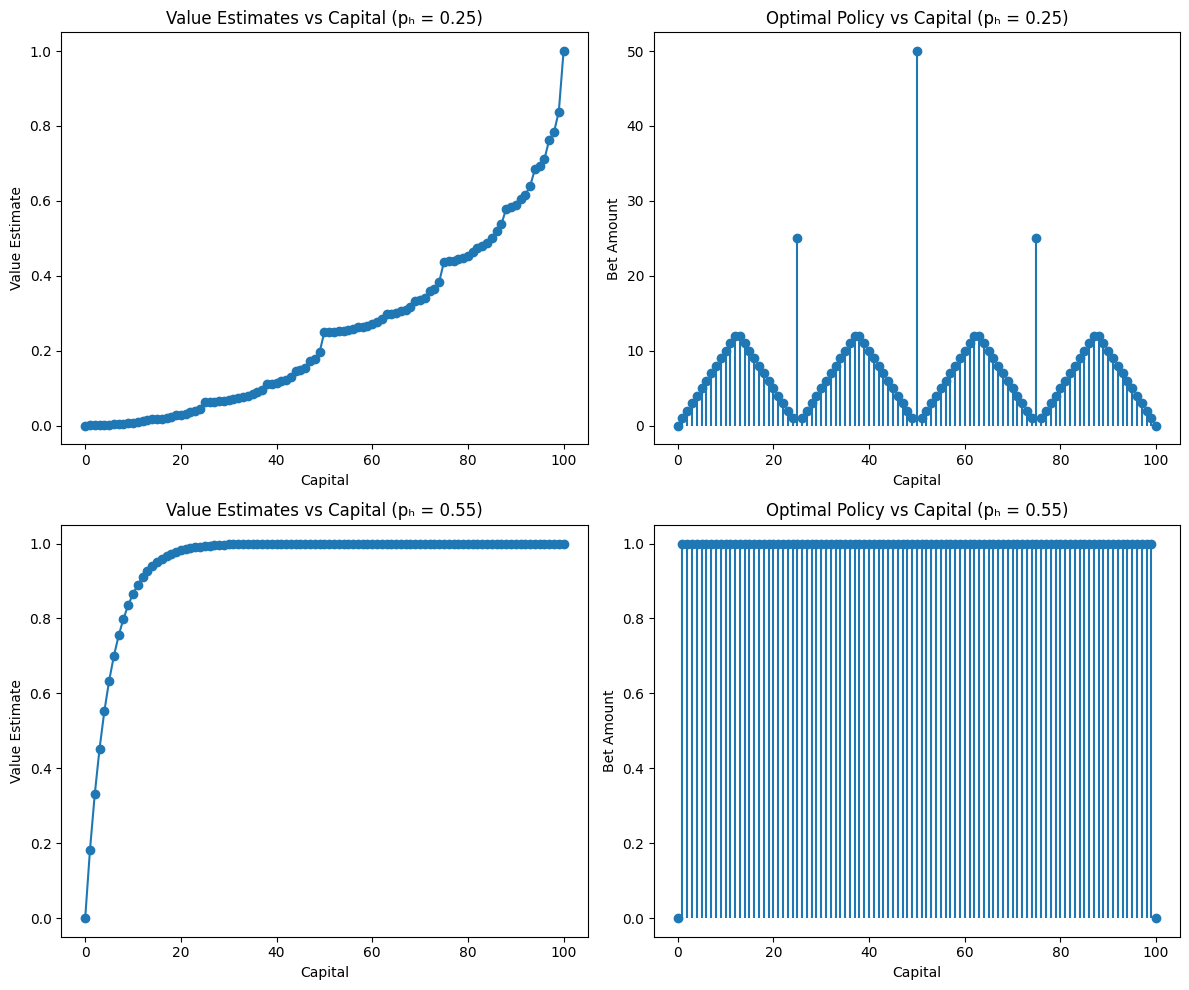

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, p in enumerate([0.25, 0.55]):
    V, policy, iters = value_iteration(p)
    capitals = np.arange(101)

    # Plot value estimates vs capital
    ax_value = axes[i][0]
    ax_value.plot(capitals, V, marker='o')
    ax_value.set_title(f"Value Estimates vs Capital (pₕ = {p})")
    ax_value.set_xlabel("Capital")
    ax_value.set_ylabel("Value Estimate")

    # Plot optimal policy (bet) vs capital
    ax_policy = axes[i][1]
    ax_policy.stem(capitals, policy, basefmt=" ")
    ax_policy.set_title(f"Optimal Policy vs Capital (pₕ = {p})")
    ax_policy.set_xlabel("Capital")
    ax_policy.set_ylabel("Bet Amount")

plt.tight_layout()
plt.show()

#Conclusion
The implementation of Value Iteration to solve the Gambler’s Problem provides insightful observations into how optimal betting strategies vary with the probability of winning a coin flip. When analyzing the results for different values of
𝑝
ℎ
p
h
​
  (i.e., 0.25, 0.4, and 0.55), it is evident that the optimal policy and the expected value function are highly sensitive to the underlying probability. For a lower value of
𝑝
ℎ
=
0.25
p
h
​
 =0.25, where the odds are unfavorable, the gambler adopts a more conservative betting strategy, as reflected by the sparse and small-valued stakes across most capital states. This results in a lower probability of reaching the goal, shown by the flattened value function. As
𝑝
ℎ
p
h
​
  increases to 0.4, the policy starts to reflect more moderate risk-taking, and the value function becomes steeper, indicating a higher chance of success. Finally, with
𝑝
ℎ
=
0.55
p
h
​
 =0.55, the policy becomes notably more aggressive, with larger stakes chosen across a wide range of capital levels. The value function shows a rapid rise, suggesting a significant improvement in the probability of reaching the terminal goal of $100. Overall, the study demonstrates that value iteration effectively adapts the strategy based on environment dynamics, and that higher winning probabilities yield more optimistic and risk-inclined policies, reinforcing the principle of dynamic programming in reinforcement learning.